<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/main/prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 10.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=92a5e6d5f1f6902ae30ce78601dde1e2b41dba1092d56db30e138077eb788a3e
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Predicción Stocks from Yahoo Finance with Prophet

In [3]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,4290000,0,0.0
1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000,0,0.0
1996-05-13,24.000000,24.100000,23.299999,23.900000,700000,0,0.0
1996-05-14,24.000000,24.100000,23.100000,23.600000,310000,0,0.0
1996-05-15,23.600000,23.700001,23.000000,23.200001,545000,0,0.0
...,...,...,...,...,...,...,...
2021-01-25,231.669998,233.520004,230.449997,233.009995,5097700,0,0.0
2021-01-26,233.000000,233.500000,231.330002,231.570007,3944800,0,0.0
2021-01-27,230.000000,230.000000,226.100006,227.360001,8227100,0,0.0


In [5]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6219,2021-01-25,233.009995
6220,2021-01-26,231.570007
6221,2021-01-27,227.360001
6222,2021-01-28,230.949997
6223,2021-01-29,227.869995


In [6]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [7]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6582,2022-01-23,248.596378,237.750512,261.907782
6583,2022-01-24,245.488929,232.570613,257.729820
6584,2022-01-25,245.610792,233.058084,258.321732
6585,2022-01-26,245.643615,232.908892,258.325955
6586,2022-01-27,245.686117,232.593081,258.259611
6587,2022-01-28,245.818321,234.197514,258.227810
6588,2022-01-29,248.855863,237.060178,261.033537


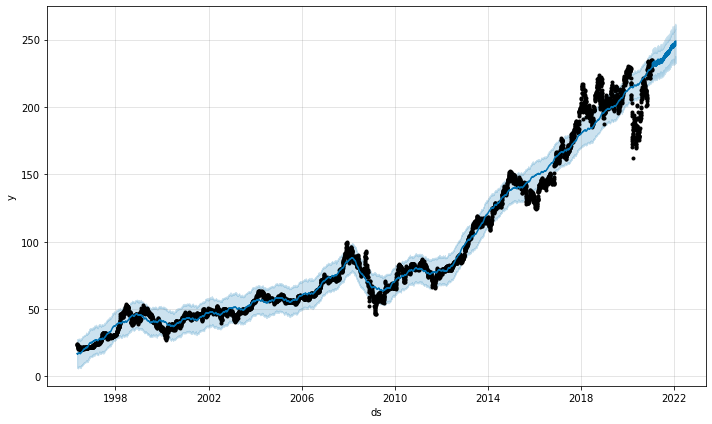

In [8]:
m.plot(forecast);

## Make it a Function

In [10]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-02-13,6.956727,-4.365285,15.683230,6.956727,6.956727,-1.384947,-1.384947,-1.384947,0.179600,0.179600,0.179600,-1.564547,-1.564547,-1.564547,0.0,0.0,0.0,5.571780
1,2002-02-14,6.951650,-5.670554,15.610938,6.951650,6.951650,-1.791583,-1.791583,-1.791583,0.045816,0.045816,0.045816,-1.837399,-1.837399,-1.837399,0.0,0.0,0.0,5.160067
2,2002-02-15,6.946573,-4.973133,15.740576,6.946573,6.946573,-1.920292,-1.920292,-1.920292,0.156071,0.156071,0.156071,-2.076363,-2.076363,-2.076363,0.0,0.0,0.0,5.026281
3,2002-02-19,6.926265,-6.183579,14.682816,6.926265,6.926265,-2.720888,-2.720888,-2.720888,-0.059966,-0.059966,-0.059966,-2.660922,-2.660922,-2.660922,0.0,0.0,0.0,4.205378
4,2002-02-20,6.921188,-5.743521,15.502032,6.921188,6.921188,-2.533496,-2.533496,-2.533496,0.179600,0.179600,0.179600,-2.713096,-2.713096,-2.713096,0.0,0.0,0.0,4.387692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,2021-07-24,8.228361,-2.825777,17.917872,7.232568,9.250182,-0.379117,-0.379117,-0.379117,-0.105220,-0.105220,-0.105220,-0.273896,-0.273896,-0.273896,0.0,0.0,0.0,7.849245
4950,2021-07-25,8.223432,-2.342620,18.311064,7.219031,9.252865,-0.346418,-0.346418,-0.346418,-0.105221,-0.105221,-0.105221,-0.241197,-0.241197,-0.241197,0.0,0.0,0.0,7.877013
4951,2021-07-26,8.218502,-2.402772,18.600333,7.204461,9.255548,-0.324815,-0.324815,-0.324815,-0.111080,-0.111080,-0.111080,-0.213735,-0.213735,-0.213735,0.0,0.0,0.0,7.893687
4952,2021-07-27,8.213572,-2.862972,19.251874,7.183124,9.258230,-0.251984,-0.251984,-0.251984,-0.059966,-0.059966,-0.059966,-0.192018,-0.192018,-0.192018,0.0,0.0,0.0,7.961588


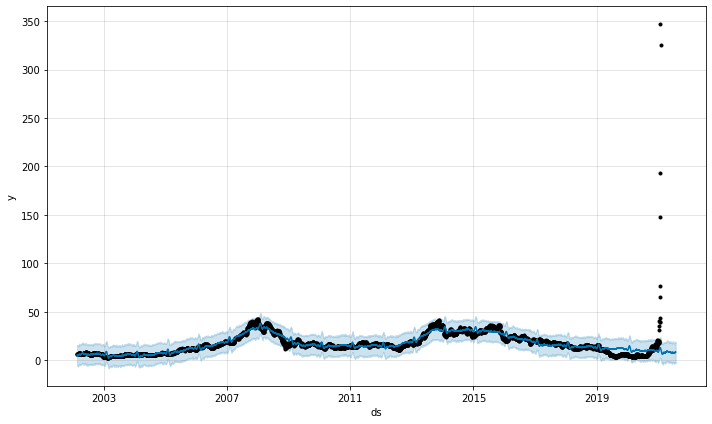

In [13]:
# GME GameStop
make_forecast('GME', 180)

Realiza la comparacion de las acciones de  tesla , google y amazon y en cual recomendaría invertir.